<a href="https://colab.research.google.com/github/Siddhu290/Machine_Learning/blob/main/2024-07-10/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering Algorithms**
---

Given set of data points, group them into a cluster so that


*   points within each cluster are similar to each other
*   points from different clusters are dissimilar

usually, points are in a high-dimentional space, are similarity is defined using a distance measure
*   Euclidean, cosine, Jaccard, edit distance,...








---
###Examples
 Cluster customers based on their purchase
histories

 Cluster products based on the sets of
customers who purchased them

 Cluster documents based on similar words or
shingles

 Cluster DNA sequences based on edit
distance

###Methods of Clustering
 Hierarchical (Agglomera ve):
  
     Ini ally, each point in cluster by itself.
     Repeatedly combine the two “nearest” clusters
    into one.
 Point Assignment:

     Maintain a set of clusters.
     Place points into their “nearest” cluster.

###Hirarchical Clustering

 Key Opera on: repeatedly combine two
nearest clusters
  
 Three important ques ons:

     How do you represent a cluster of more than one
    point?
     How do you determine the “nearness” of clusters?
     When to stop combining clusters?
  

###Euclidean Case

 Each cluster has a well-defined centroid

     i.e., average across all the points in the cluster

 Represent each cluster by its centroid

 Distance between clusters = distance between
centroids

 The distance between the clusters should be minimun

###Non Euclidean Distance
 The only “loca ons” we can talk about are the
points themselves.
    
     I.e., there is no “average” of two points.
 Approach 1: clustroid  = point “closest” to
other points.
    
     Treat clustroid as if it were centroid, when
    compu ng intercluster distances.

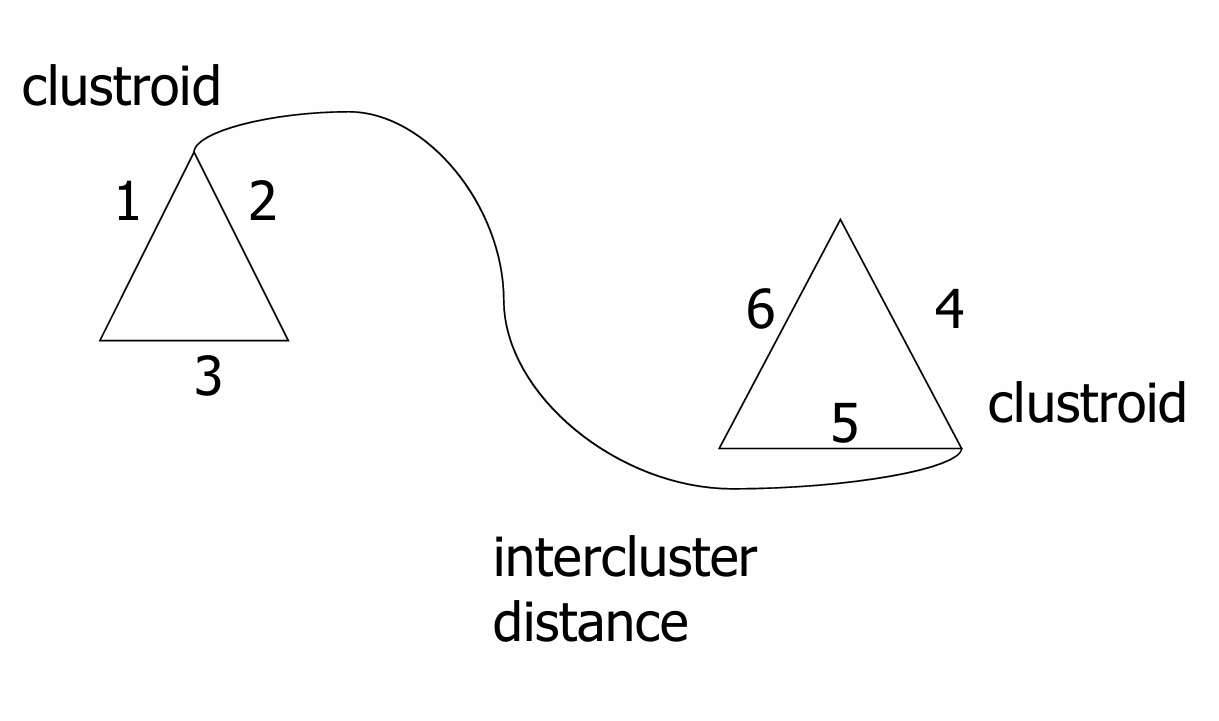

###other Approaches
 Approach 2: intercluster distance =
minimum of the distances between any two
points, one from each cluster.

 Approach 3: Pick a no on of “cohesion” of
clusters, e.g., maximum distance from the
clustroid.
    
     Merge clusters whose union  is most cohesive.

###Cohension

 Approach 1: Use the diameter  of the merged
cluster = maximum distance between points
in the cluster.

 Approach 2: Use the average distance
between points in the cluster

 Approach 3: Use a density-based approach:  take the diameter or average distance, e.g., and divide by the number of points in the cluster.

     Perhaps raise the number of points to a power first, e.g., square-root.

###Stoping Criteria

 Stop when we have k clusters

 Stop when the cohesion of the cluster
resulting from the best merger falls below a
threshold

 Stop when there is a sudden jump in the
cohesion value

##introduction to clasification and clustering

In [54]:
from sklearn.datasets import load_iris

In [55]:
data=load_iris()
X=data.data
Y=data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
import matplotlib.pyplot as plt

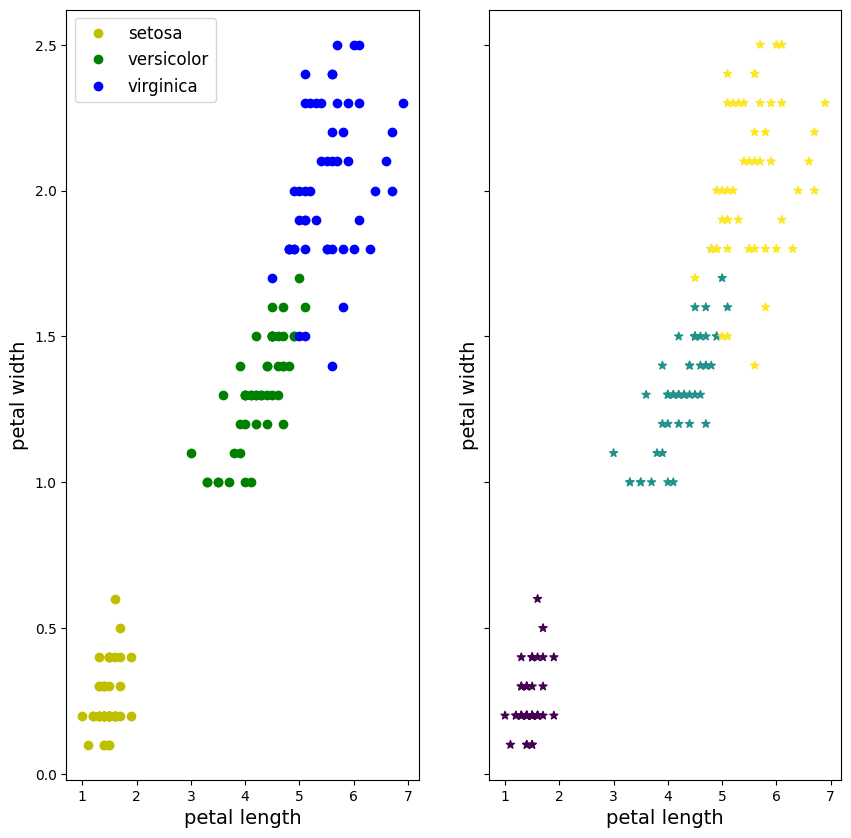

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(X[Y==0,2], X[Y==0,3], "yo", label="setosa")
plt.plot(X[Y==1,2], X[Y==1,3], "go", label="versicolor")
plt.plot(X[Y==2,2], X[Y==2,3], "bo", label="virginica")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(fontsize=12)
plt.subplot(122)
plt.scatter(X[:,2], X[:,3], c=Y, marker='*')
plt.xlabel("petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.ylabel("petal width", fontsize=14)
plt.show()

In [58]:
from sklearn.datasets import make_blobs
import numpy as np

In [59]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [60]:
x,y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [61]:

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


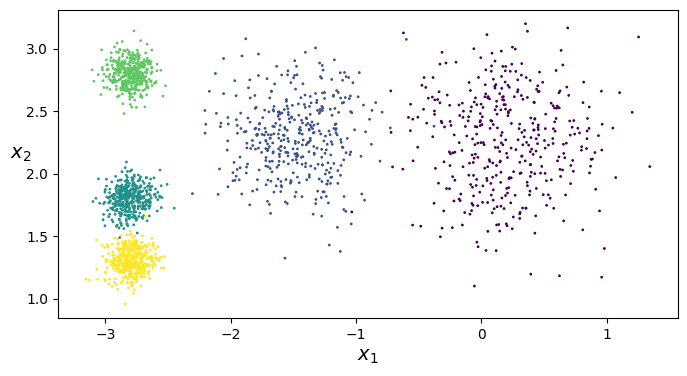

In [62]:
plt.figure(figsize=(8, 4))
plot_clusters(x,y)
plt.show()

In [63]:
from sklearn.cluster import KMeans

In [64]:
k=5
kmeans=KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
y_pred

array([4, 1, 0, ..., 2, 0, 1], dtype=int32)

In [66]:
y_pred is kmeans.labels_

True

In [68]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [69]:
kmeans.labels_

array([4, 1, 0, ..., 2, 0, 1], dtype=int32)

In [70]:
x_new=np.array([[0,2],[3,2],[3,3],[4,3],[0,3],[0,0]])
kmeans.predict(x_new)

array([0, 0, 0, 0, 0, 0], dtype=int32)

Decision Boundries

In [91]:
def plot_data(x):
    plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='*', s=5, linewidths=5,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, x, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = x.min(axis=0) - 0.1
    maxs = x.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(x)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

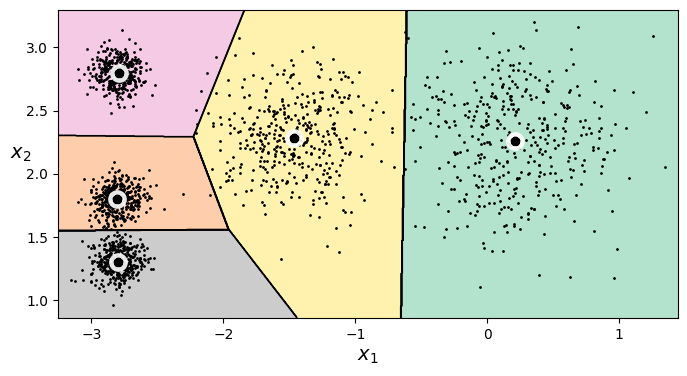

In [92]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, x)
plt.show()

In [ ]:
/